# Data Exploration

## Setup

### Downloading Librabies

In [14]:
%pip install pandas
%pip install spacy
%pip install nltk
%pip install scikit-learn
%pip install tensorflow
%pip install user-agents
%pip install  matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to

### Importing Librabies

In [3]:
import pandas as pd
from user_agents import parse
import numpy as np

## Reading Data

### Read User behaviors and Non statistical exploration

#### Typing Data

In [4]:
key_stroke = pd.read_csv("../DataSets/UserBehaviors/Keystroke/free-text.csv")

key_stroke = key_stroke.iloc[:, :-1]

# Get the unique user IDs
#first_10_user_ids = key_stroke['participant'].unique()[:10]

# Filter the data for the first 10 unique users
#first_10_users_data = key_stroke[key_stroke['participant'].isin(first_10_user_ids)]

# Drop unneeded columns
#first_10_users_data = first_10_users_data.drop(first_10_users_data.columns[-1], axis=1)

# Display head
key_stroke.isnull().sum()

/var/folders/jw/dxpsx41s5xlf3dsmc4b4f4tc0000gn/T/ipykernel_15397/53650565.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  key_stroke = pd.read_csv("../DataSets/UserBehaviors/Keystroke/free-text.csv")


participant       0
session           0
key1              0
key2            198
DU.key1.key1      0
DD.key1.key2    198
DU.key1.key2    198
UD.key1.key2    198
UU.key1.key2    198
dtype: int64

#### Mouse movement && Session Info

In [5]:
session_info = pd.read_csv("../DataSets/UserBehaviors/mousedynamics/EVTRACKINFO/EVTRACKINFO.csv", sep='\t')
mouse_movements = pd.read_csv("../DataSets/UserBehaviors/mousedynamics/EVTRACKTRACK/EVTRACKTRACK.csv", sep='\t')


# Filter uneed data
mouse_data = mouse_movements[mouse_movements['event'].str.contains('mouse', case=False, na=False)]

# Display head
# Drop unneeded columns
del session_info['_id']
del mouse_data['_id']
del mouse_data['cursor']
del session_info['documentw']
del session_info['documenth']
del session_info['date']
del mouse_data['key']

print(mouse_data.isnull().sum())
print(session_info.isnull().sum())

timestamp     0
xpos          0
ypos          0
event         0
user          0
session_id    0
dtype: int64
user          0
session_id    0
ua            0
screen        0
screenh       0
windoww       0
windowh       0
dtype: int64


In [6]:
def extract_browser_info_and_os(ua_string):
    # Parse the user agent string
    user_agent = parse(ua_string)

    # Extract browser and operating system
    browser = user_agent.browser
    os = user_agent.os
    device =  user_agent.device

    return {"browser": str(browser), "os": str(os), "device": str(device)}

# Apply extraction to session_info
session_info[['browser', 'os', 'device']] = session_info['ua'].apply(lambda ua: pd.Series(extract_browser_info_and_os(ua)))

session_info

,user,session_id,ua,screen,screenh,windoww,windowh,browser,os,device
0,Alluserspreauth,366758616,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1920,1080,1920,951,"Browser(family='Chrome', version=(76, 0, 3809)...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
1,User1,366758624,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1920,1080,1920,951,"Browser(family='Chrome', version=(76, 0, 3809)...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
2,Alluserspreauth,366758629,Mozilla/5.0 (X11; Linux x86_64; rv:73.0) Gecko...,1920,1080,1856,919,"Browser(family='Firefox', version=(73, 0), ver...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
3,User2,366758657,Mozilla/5.0 (X11; Linux x86_64; rv:73.0) Gecko...,1920,1080,1856,919,"Browser(family='Firefox', version=(73, 0), ver...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
4,Alluserspreauth,366758800,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1920,1080,1853,900,"Browser(family='Chrome', version=(80, 0, 3987)...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
...,...,...,...,...,...,...,...,...,...,...
342,Alluserspreauth,366993675,Mozilla/5.0 (Linux; Android 9; Mi A1) AppleWeb...,360,640,360,263,"Browser(family='Chrome Mobile', version=(80, 0...","OperatingSystem(family='Android', version=(9,)...","Device(family='XiaoMi Mi A1', brand='XiaoMi', ..."
343,User1,366993687,Mozilla/5.0 (Linux; Android 9; Mi A1) AppleWeb...,360,640,360,560,"Browser(family='Chrome Mobile', version=(80, 0...","OperatingSystem(family='Android', version=(9,)...","Device(family='XiaoMi Mi A1', brand='XiaoMi', ..."
344,User6,366999237,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1920,1080,1850,981,"Browser(family='Chrome', version=(79, 0, 3945)...","OperatingSystem(family='Linux', version=(), ve...","Device(family='Other', brand=None, model=None)"
345,User11,367012614,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73....,1920,1080,1920,951,"Browser(family='Firefox', version=(73, 0), ver...","OperatingSystem(family='Ubuntu', version=(), v...","Device(family='Other', brand=None, model=None)"


## LSTM Model

In [7]:
# Merge mouse_data with session_info based on user and session_id
merged_data = mouse_data.merge(session_info[['user', 'session_id', 'browser', 'os']], on=['user', 'session_id'], how='left')

print("\nMerged Data with Browser and OS:")
print(len(merged_data))
print(len(mouse_data))

# Count unique operating systems
unique_os_count = merged_data['os'].nunique()
print(f"Number of unique operating systems: {unique_os_count}")

# Count unique browsers
unique_browsers_count = merged_data['browser'].nunique()
print(f"Number of unique browsers: {unique_browsers_count}")


Merged Data with Browser and OS:
29220
29220
Number of unique operating systems: 3
Number of unique browsers: 5


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le_merchant = LabelEncoder()
merged_data['browser'] = le_merchant.fit_transform(merged_data['browser'].values)

le_transaction_type = LabelEncoder()
merged_data['os'] = le_transaction_type.fit_transform(merged_data['os'].values)

# Count unique operating systems
unique_os_count = merged_data['os'].nunique()
print(f"Number of unique operating systems: {unique_os_count}")

# Count unique browsers
unique_browsers_count = merged_data['browser'].nunique()
print(f"Number of unique browsers: {unique_browsers_count}")

print(len(merged_data[merged_data["user"] == "Alluserspreauth"]))
print(len(merged_data[merged_data["user"] != "Alluserspreauth"]))
print(len(merged_data))

print(merged_data)

model_mouse_data = merged_data[merged_data["user"] != "Alluserspreauth"]

Number of unique operating systems: 3
Number of unique browsers: 5
1136
28084
29220
                     timestamp    xpos   ypos      event             user  \
0      2020-02-17 08:35:44.485   343.0   65.0  mousemove  Alluserspreauth   
1      2020-02-17 08:35:44.785  1010.0  436.0  mousemove  Alluserspreauth   
2      2020-02-17 08:35:44.985   894.0  628.0   mouseout  Alluserspreauth   
3      2020-02-17 08:35:45.187   884.0  645.0  mousemove  Alluserspreauth   
4      2020-02-17 08:35:45.392   879.0  645.0  mousemove  Alluserspreauth   
...                        ...     ...    ...        ...              ...   
29215  2020-02-25 09:05:42.182   503.0  287.0   mouseout            User1   
29216  2020-02-25 09:05:42.382   446.0  172.0   mouseout            User1   
29217  2020-02-25 09:05:42.582   440.0  156.0  mousemove            User1   
29218  2020-02-25 09:05:46.228   440.0  156.0  mousemove            User1   
29219  2020-02-25 09:05:46.432   254.0   46.0   mouseout            U

In [9]:
key_stroke.rename(columns={'participant': 'user'}, inplace=True)
# Step 2: Limit to the first 11 users
selected_users = key_stroke['user'].drop_duplicates().head(11)

x = 1
# Step 3: Rename users to Userx format
for user in selected_users:
    key_stroke.loc[key_stroke['user'] == user, 'user'] = "User" + str(x)
    x = x+1

key_stroke = key_stroke[key_stroke["user"].str.contains("User", case=False, na=False)]

# Step 2: Create a pseudo-timestamp for keystrokes
key_stroke['timestamp'] = pd.date_range(start='2020-02-17 09:35:49.089692', periods=60129, freq='1s')

key_stroke

,user,session,key1,key2,DU.key1.key1,DD.key1.key2,DU.key1.key2,UD.key1.key2,UU.key1.key2,timestamp
0,User1,1,W,Shift,0.15,-0.796,0.166,-0.946,0.016,2020-02-17 09:35:49.089692
1,User1,1,Shift,e,0.962,1.148,1.255,0.186,0.293,2020-02-17 09:35:50.089692
2,User1,1,e,Space,0.107,0.172,0.252,0.065,0.145,2020-02-17 09:35:51.089692
3,User1,1,Space,b,0.08,0.200,0.280,0.120,0.200,2020-02-17 09:35:52.089692
4,User1,1,b,e,0.08,0.320,0.480,0.240,0.400,2020-02-17 09:35:53.089692
...,...,...,...,...,...,...,...,...,...,...
60124,User11,2,s,t,0.108,0.180,0.280,0.072,0.172,2020-02-18 02:17:53.089692
60125,User11,2,t,a,0.1,0.067,0.196,-0.033,0.096,2020-02-18 02:17:54.089692
60126,User11,2,a,r,0.129,0.384,0.489,0.255,0.360,2020-02-18 02:17:55.089692
60127,User11,2,r,s,0.105,0.131,0.264,0.026,0.159,2020-02-18 02:17:56.089692


In [10]:
# Step 1: Merge mouse and keystroke data
# We will use a time window to align keystrokes with mouse events
#time_window = 3  # Define a time window of 5 seconds

def merge_with_time_window(mouse_data, keystroke_data, time_window):
    # Ensure timestamps are in datetime format
    mouse_data.loc[:, 'timestamp'] = pd.to_datetime(mouse_data['timestamp'])
    keystroke_data.loc[:, 'timestamp'] = pd.to_datetime(keystroke_data['timestamp'])
    
    # Ensure time_window is an integer or float
    if not isinstance(time_window, (int, float)):
        raise ValueError("time_window must be an int or float representing seconds.")
    
    merged_data = []
    for _, mouse_row in mouse_data.iterrows():
        # Get the user ID and timestamp for the mouse movement
        user_id = mouse_row['user']
        mouse_time = mouse_row['timestamp']
        
        # Find keystrokes within the time window
        keystrokes_within_window = keystroke_data[
            (keystroke_data['user'] == user_id) & 
            (keystroke_data['timestamp'] >= mouse_time - pd.Timedelta(seconds=time_window)) & 
            (keystroke_data['timestamp'] <= mouse_time + pd.Timedelta(seconds=time_window))
        ]
        
        for _, keystroke_row in keystrokes_within_window.iterrows():
            # Collect relevant information for each mouse and keystroke pair
            merged_data.append({
                'mouse_timestamp': mouse_time,
                'user': user_id,
                'xpos': mouse_row['xpos'],
                'ypos': mouse_row['ypos'],
                'keystroke_timestamp': keystroke_row['timestamp'],
                'key1': keystroke_row['key1'],
                'key2': keystroke_row['key2'],
                'DU.key1.key1': keystroke_row['DU.key1.key1'],
                'DD.key1.key2': keystroke_row['DD.key1.key2'],
                'DU.key1.key2': keystroke_row['DU.key1.key2'],
                'UD.key1.key2': keystroke_row['UD.key1.key2'],
                'UU.key1.key2': keystroke_row['UU.key1.key2'],
                'event': mouse_row['event'],
                'os': mouse_row['os'],
                'browser': mouse_row['browser']
            })

    # Convert the merged data into a DataFrame
    merged_df = pd.DataFrame(merged_data)
    
    return merged_df

In [11]:
# Merge mouse and keystroke data
combined_data = merge_with_time_window(model_mouse_data, key_stroke, 3)
print(combined_data.shape)

combined_data.dropna(inplace=True)

# Step 2: Feature Engineering
combined_data['key_encoded_1'] = LabelEncoder().fit_transform(combined_data['key1'].fillna(''))  # Encode keys
combined_data['key_encoded_2'] = LabelEncoder().fit_transform(combined_data['key2'].fillna(''))  # Encode keys
combined_data['event'] = LabelEncoder().fit_transform(combined_data['event'].fillna(''))  # Encode keys
combined_data['browser'] = LabelEncoder().fit_transform(combined_data['browser'].fillna(''))  # Encode keys
combined_data['os'] = LabelEncoder().fit_transform(combined_data['os'].fillna(''))  # Encode keys

standard_scaler = StandardScaler()
combined_data[['xpos', 'ypos', 'DU.key1.key1', 'DD.key1.key2', 'DU.key1.key2', 'UD.key1.key2', 'UU.key1.key2']] = standard_scaler.fit_transform(combined_data[['xpos', 'ypos', 'DU.key1.key1', 'DD.key1.key2', 'DU.key1.key2', 'UD.key1.key2', 'UU.key1.key2']])


# Step 3: Prepare data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Select features for LSTM
features = combined_data[['xpos', 'ypos', 'key_encoded_1', 'key_encoded_2', 'event', 'os', 'browser', 'DU.key1.key1', 'DD.key1.key2', 'DU.key1.key2', 'UD.key1.key2', 'UU.key1.key2']].values
SEQ_LENGTH = 12
X = create_sequences(features, SEQ_LENGTH)

# Verify the shapes of the output
print("Shape of X (sequences):", X.shape)

(3816, 15)
Shape of X (sequences): (3804, 12, 12)


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l2

def create_lstm_autoencoder(timesteps, n_features, latent_dim=64):
    # Input layer
    inputs = Input(shape=(timesteps, n_features))

    # Encoder with optimized architecture
    encoded = LSTM(256, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.003))(inputs)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.4)(encoded)
    encoded = LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.003))(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Dropout(0.4)(encoded)
    encoded = LSTM(64, activation='tanh', return_sequences=False, kernel_regularizer=l2(0.003))(encoded)
    encoded = BatchNormalization()(encoded)

    # Latent space representation
    latent = Dense(latent_dim, activation='tanh')(encoded)

    # Decoder with optimized architecture
    decoded = RepeatVector(timesteps)(latent)
    decoded = LSTM(64, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.003))(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dropout(0.4)(decoded)
    decoded = LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.003))(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Dropout(0.4)(decoded)
    decoded = LSTM(256, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.003))(decoded)

    # Output layer
    output = TimeDistributed(Dense(n_features))(decoded)

    # Full autoencoder model
    autoencoder = Model(inputs, output)
    return autoencoder

In [41]:
# Instantiate and compile the model
latent_dim = 32
global_autoencoder = create_lstm_autoencoder(SEQ_LENGTH, X.shape[2], latent_dim)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9
)

# Compile with Adam and learning rate scheduler
global_autoencoder.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mae')

# Optionally add Early Stopping for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Assuming 'global_transaction_data' is the dataset for general training (preprocessed)
# Train the global model
histogram_global = global_autoencoder.fit(X, X, epochs=180, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 4.2004 - val_loss: 2.0663
Epoch 2/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 1.7459 - val_loss: 1.7505
Epoch 3/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 1.5965 - val_loss: 1.5016
Epoch 4/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 1.6054 - val_loss: 1.3208
Epoch 5/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 1.5502 - val_loss: 1.3666
Epoch 6/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 1.5592 - val_loss: 1.3053
Epoch 7/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 1.5395 - val_loss: 1.2659
Epoch 8/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 1.5078 - val_loss: 1.2619
Epoch 9/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 1.5006 - val_loss: 1.2171
Epoch 10/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - loss: 1.4456 - val_loss: 1.2270
Epoch 11/180
191/191 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 1.4415 - val_loss: 1.1460
Epoch 12/180
191/19

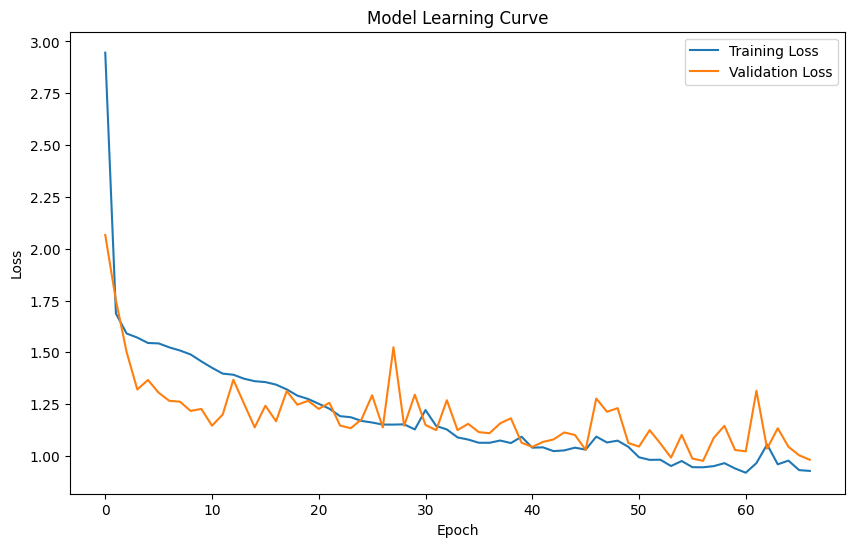

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(histogram_global.history['loss'], label='Training Loss')
plt.plot(histogram_global.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Learning Curve')
plt.legend()
plt.show()

In [27]:
def build_fraud_detection_model(autoencoder):
    # Freeze all encoder layers
    for layer in autoencoder.layers[:5]:  # Assuming the first 5 layers are the encoder layers
        layer.trainable = False

    # Extract the encoder output
    encoder_output = autoencoder.layers[-7].output  # Adjust index if needed based on the model structure

    # Define a new model combining encoder and classifier
    fraud_detector = Model(inputs=autoencoder.input, outputs=encoder_output)

    # Compile the model with a binary cross-entropy loss
    fraud_detector.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    return fraud_detector

# Create the fraud detection model using the pre-trained autoencoder
fraud_detector = build_fraud_detection_model(global_autoencoder)

# For now, you can use the valid transactions to simulate training
# Example:
fraud_detector.fit(X_train, X_train, epochs=10, batch_size=16, validation_split=0.2)

NameError: name 'plt' is not defined

In [ ]:
import numpy as np

# Define a function to calculate reconstruction error
def calculate_reconstruction_error(model, data):
    reconstructed_data = model.predict(data)
    errors = np.mean(np.square(data - reconstructed_data), axis=(1, 2))  # Mean squared error for each sample
    return errors

# Calculate reconstruction error on validation data
validation_errors = calculate_reconstruction_error(fraud_detector, X_val)

# Set a threshold based on the reconstruction error distribution of valid data
threshold = np.percentile(validation_errors, 95)  # 95th percentile of validation error as threshold

# Function to detect fraud based on reconstruction error
def detect_fraud(model, transaction_data, threshold):
    error = calculate_reconstruction_error(model, transaction_data)
    fraud_flags = error > threshold
    return fraud_flags, error

# Use the function to detect fraud
fraud_flags, transaction_errors = detect_fraud(autoencoder, new_transactions, threshold)

# `fraud_flags` will be True for transactions likely to be fraud
# `transaction_errors` gives the reconstruction error for each transaction

In [75]:
from keras.models import load_model

# Load user-specific data
# Assuming you have a function to prepare user-specific data
user = combined_data[combined_data['user']=='User1']
features = user[['xpos', 'ypos', 'key_encoded_1', 'key_encoded_2', 'event', 'os', 'browser', 'DU.key1.key1', 'DD.key1.key2', 'DU.key1.key2', 'UD.key1.key2', 'UU.key1.key2']].values
X_user, y_user = create_sequences(features, SEQ_LENGTH)  # User-specific dataset

# Load the pre-trained model
#pretrained_model = load_model('pretrained_lstm_model.h5')

# Fine-tune the model on user-specific data
# Optionally, you can freeze some layers if the dataset is very small
for layer in model.layers[:-2]:  # Freeze all layers except the last two
    layer.trainable = False

# Compile the model again after modifying the layers
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fine-tune the model
history_user = model.fit(X_user, X_user, epochs=5, batch_size=8, validation_split=0.2)

# Save the fine-tuned model
#pretrained_model.save('fine_tuned_model_user.h5')

Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 6.8976 - val_loss: 8.3298
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5565 - val_loss: 8.5548
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3530 - val_loss: 8.6037
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.3165 - val_loss: 9.5555
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1509 - val_loss: 9.6063
